This notebook is the part of the coursework from the Phystech Data Sciense course. It contains two dufferent tasks for two different datasets. The aim for both is to identify subsets of proteins/genes which are discriminant between the healthy and deseased samples.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from statsmodels.sandbox.stats.multicomp import multipletests
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
%matplotlib inline

## Task 1. Mice Protein Expression

Download [here](https://www.kaggle.com/ruslankl/mice-protein-expression) 

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

In [ ]:
data = pd.read_csv("./Data_Cortex_Nuclear.csv")
data.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

In [ ]:
data.describe()

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249362     0.251640     0.049383     0.347293     0.933100   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288121     0.473361     0.287444     2.057411     3.155678   
50%       0.366378     0.565782     0.316564     2.296546     3.760855   
75%       0.487711     0.698032     0.348197     2.528481     4.440011   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000  ...   
mean      0.233168     0.181846     3.537109     0.212574     1.428682  ...   
std       0.041634     0.027042     1.295169     0.032587     0.466904  ...   
min       0.063236     0.064043     1.343998     0.112812     0.429032  ...   
25%       0.205755     0.164595     2.479834     0.190823     1.203665  ...   
50%       0.231177     0.182302     3.326520     0.210594     1.355846  ...   
75%       0.257261     0.197418     4.481940     0.234595     1.561316  ...   
max       0.539050     0.317066     7.464070     0.306247     6.113347  ...   

             SHH_N       BAD_N      BCL2_N        pS6_N      pCFOS_N  \
count  1080.000000  867.000000  795.000000  1080.000000  1005.000000   
mean      0.226676    0.157914    0.134762     0.121521     0.131053   
std       0.028989    0.029537    0.027417     0.014276     0.023863   
min       0.155869    0.088305    0.080657     0.067254     0.085419   
25%       0.206395    0.136424    0.115554     0.110839     0.113506   
50%       0.224000    0.152313    0.129468     0.121626     0.126523   
75%       0.241655    0.174017    0.148235     0.131955     0.143652   
max       0.358289    0.282016    0.261506     0.158748     0.256529   

             SYP_N   H3AcK18_N      EGR1_N    H3MeK4_N       CaNA_N  
count  1080.000000  900.000000  870.000000  810.000000  1080.000000  
mean      0.446073    0.169609    0.183135    0.205440     1.337784  
std       0.066432    0.059402    0.040406    0.055514     0.317126  
min       0.258626    0.079691    0.105537    0.101787     0.586479  
25%       0.398082    0.125848    0.155121    0.165143     1.081423  
50%       0.448459    0.158240    0.174935    0.193994     1.317441  
75%       0.490773    0.197876    0.204542    0.235215     1.585824  
max       0.759588    0.479763    0.360692    0.413903     2.129791  

[8 rows x 77 columns]

In [ ]:
data['class'].value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

In [ ]:
data.Genotype.value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

Firstly let's visualize dependence of expression levels on each other

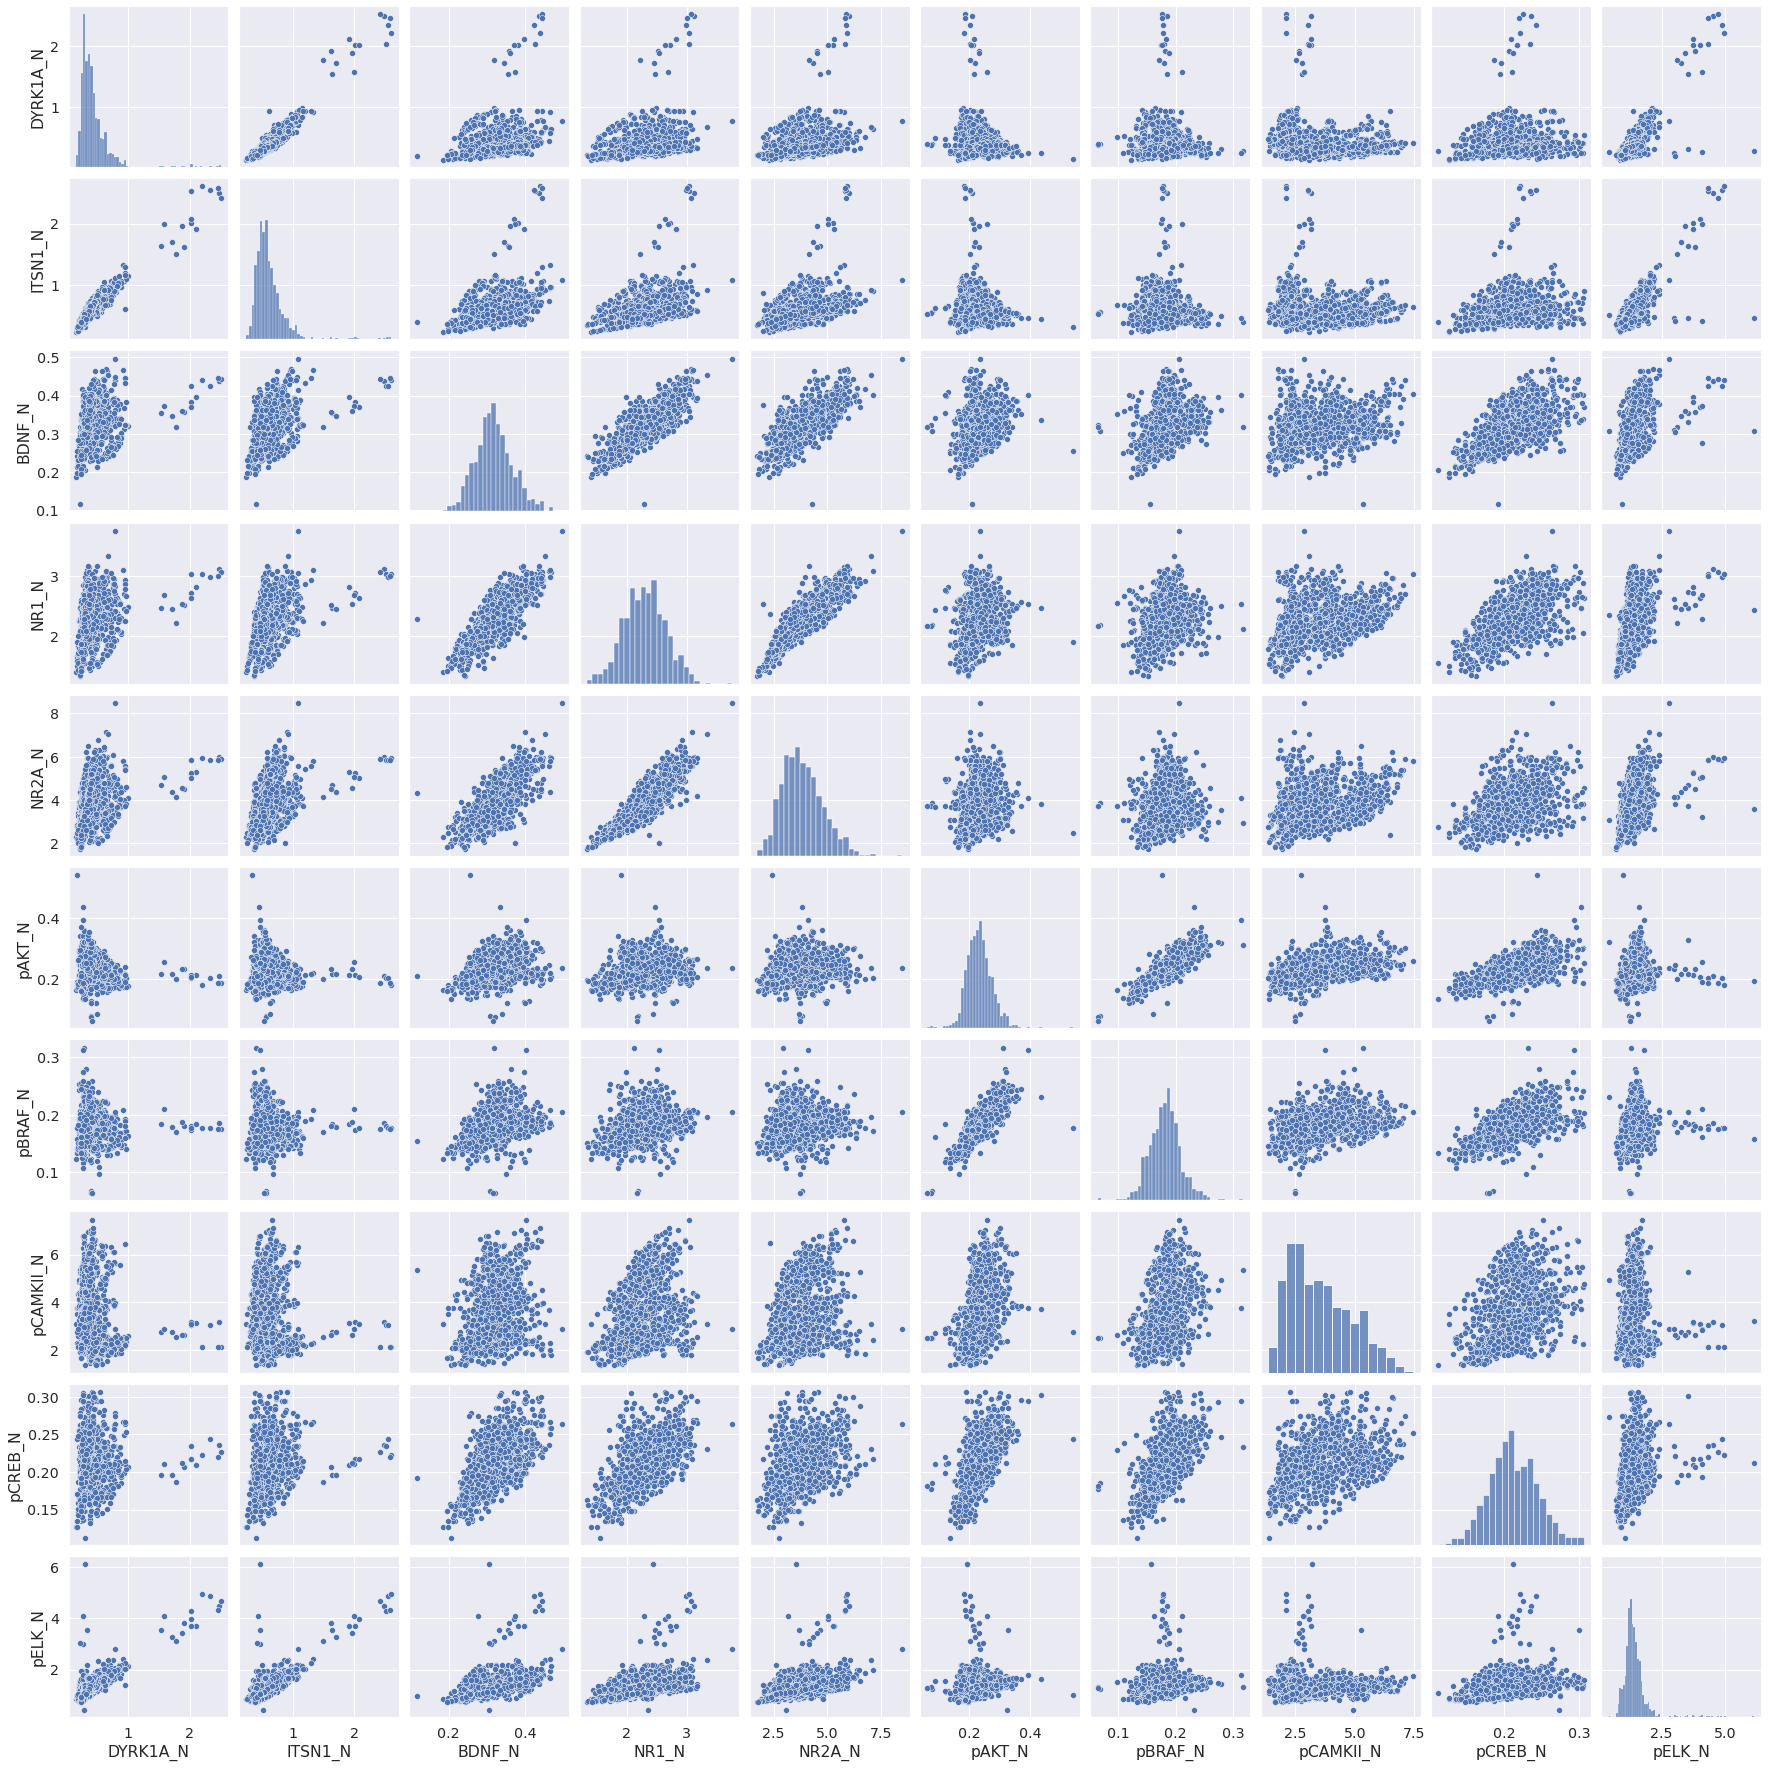

In [ ]:
sns.pairplot(data.iloc[:,1:11])

And their KDE

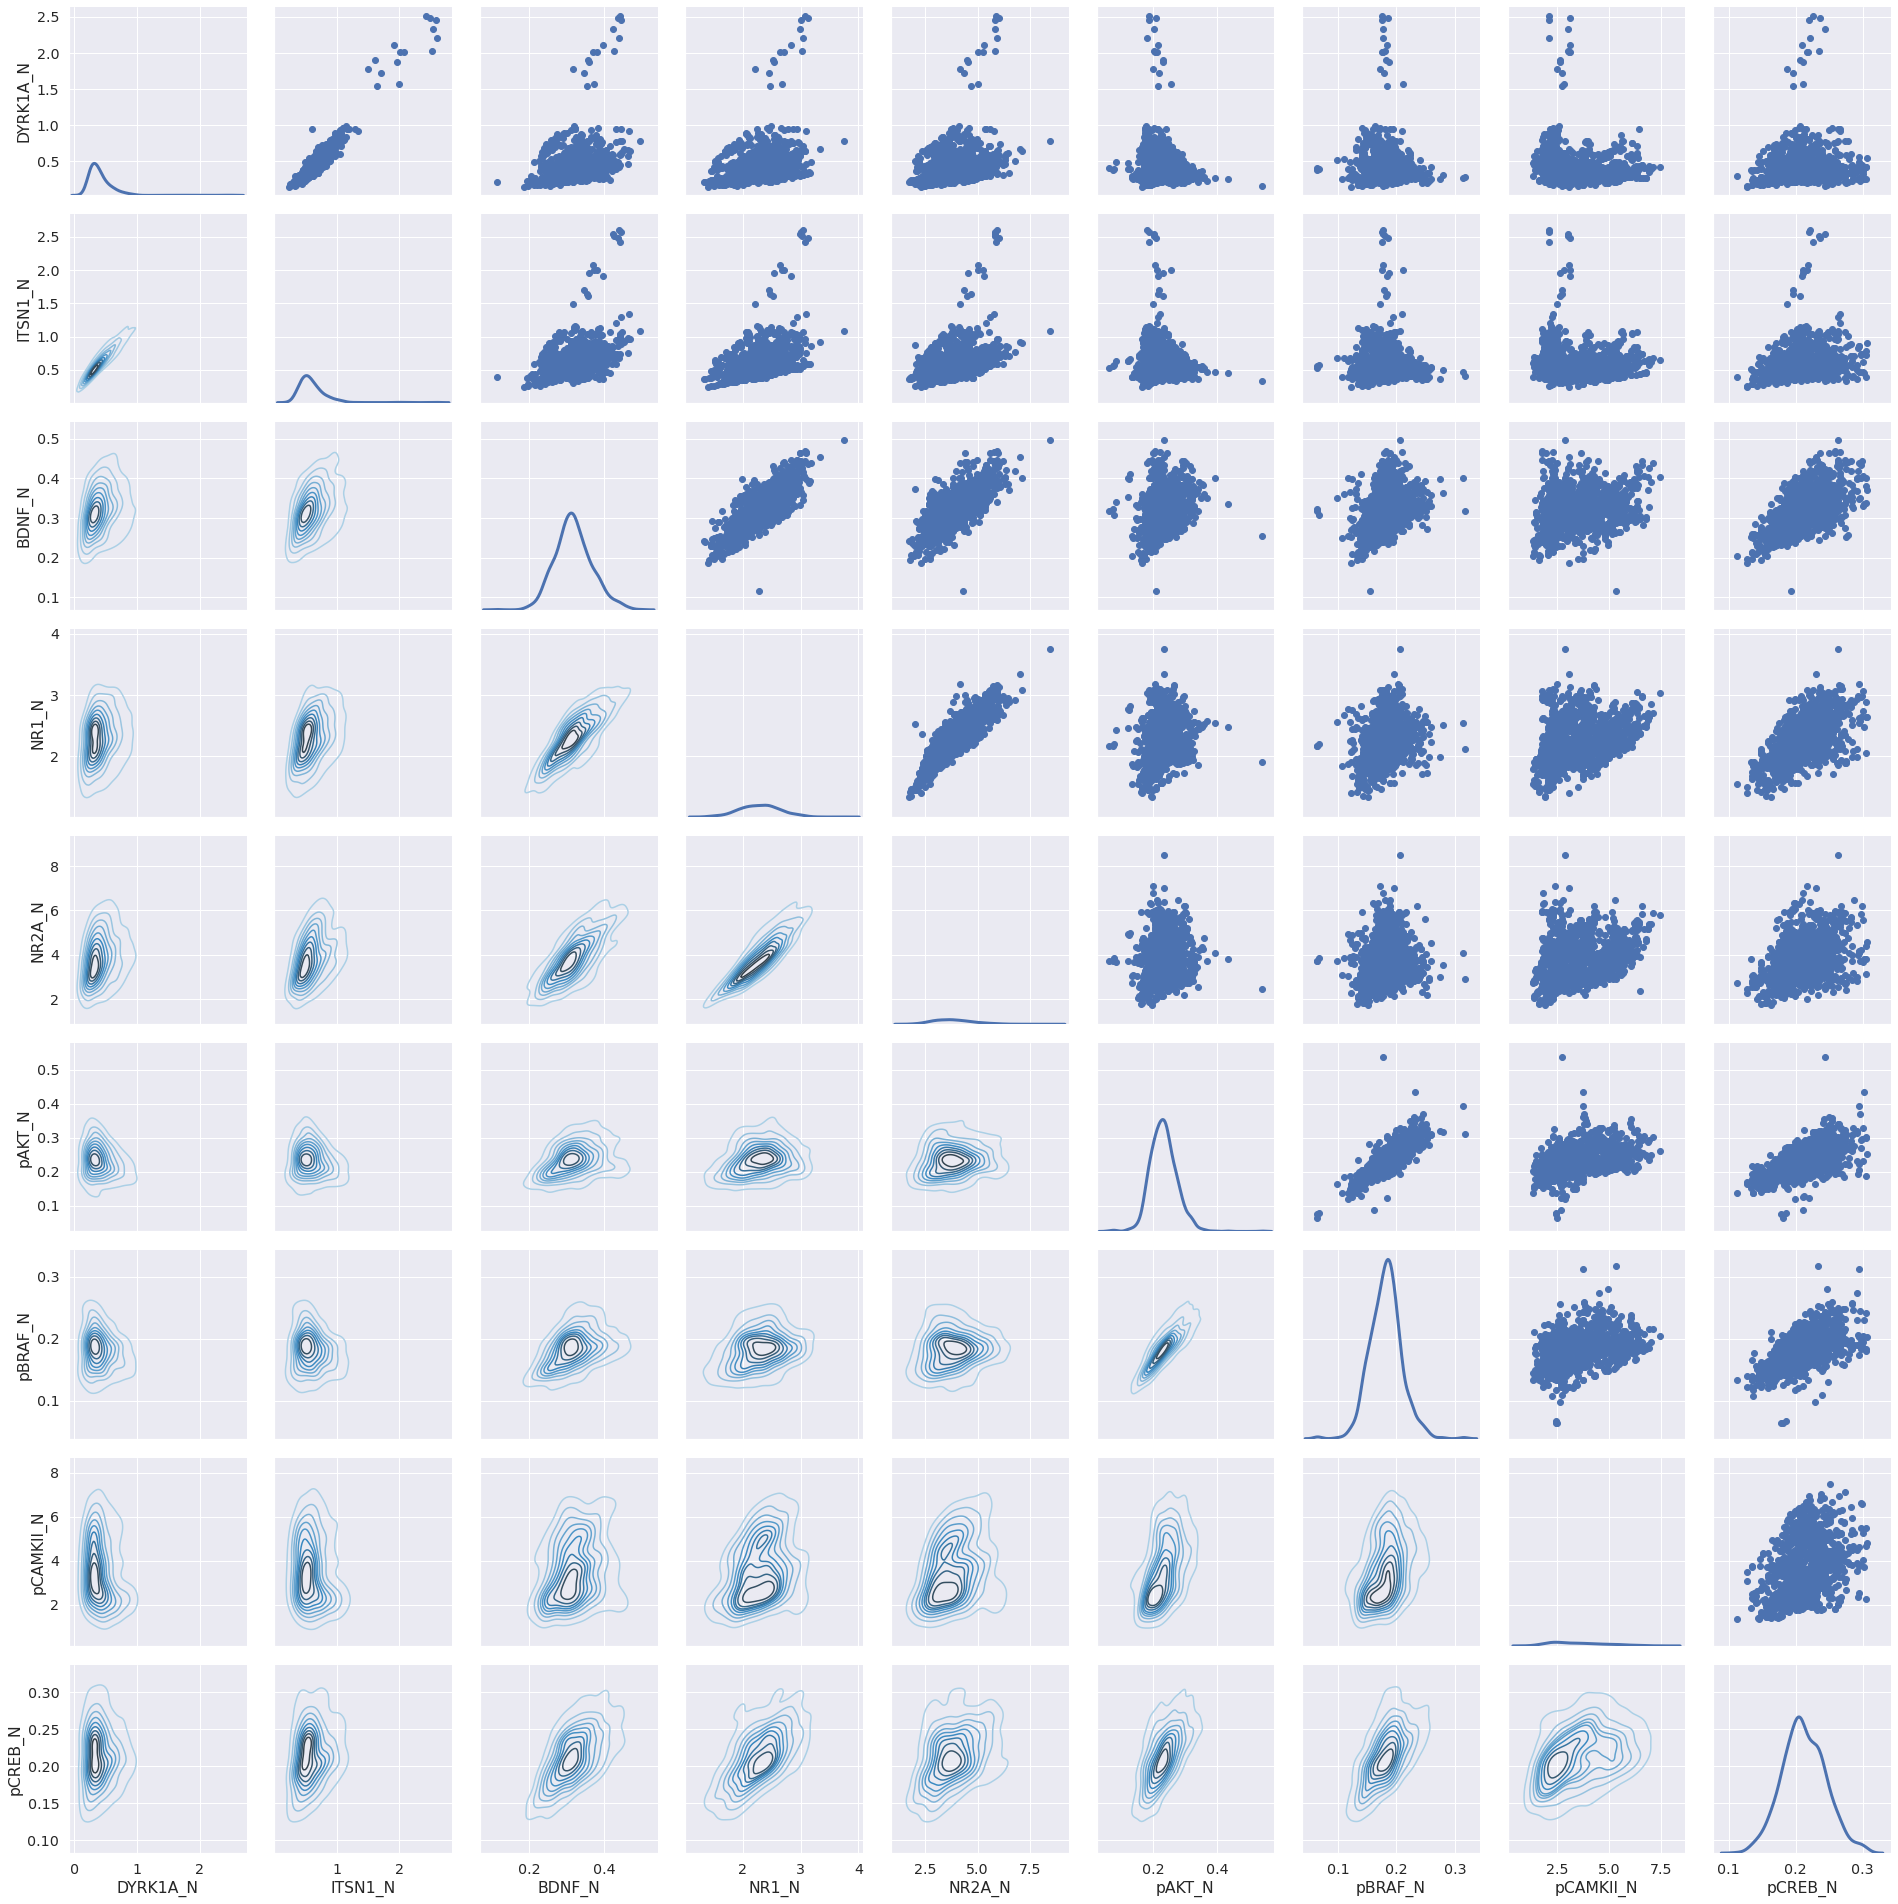

In [ ]:
g = sns.PairGrid(data.iloc[:, 1:10].dropna(), height=3)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/usr/local/lib/p

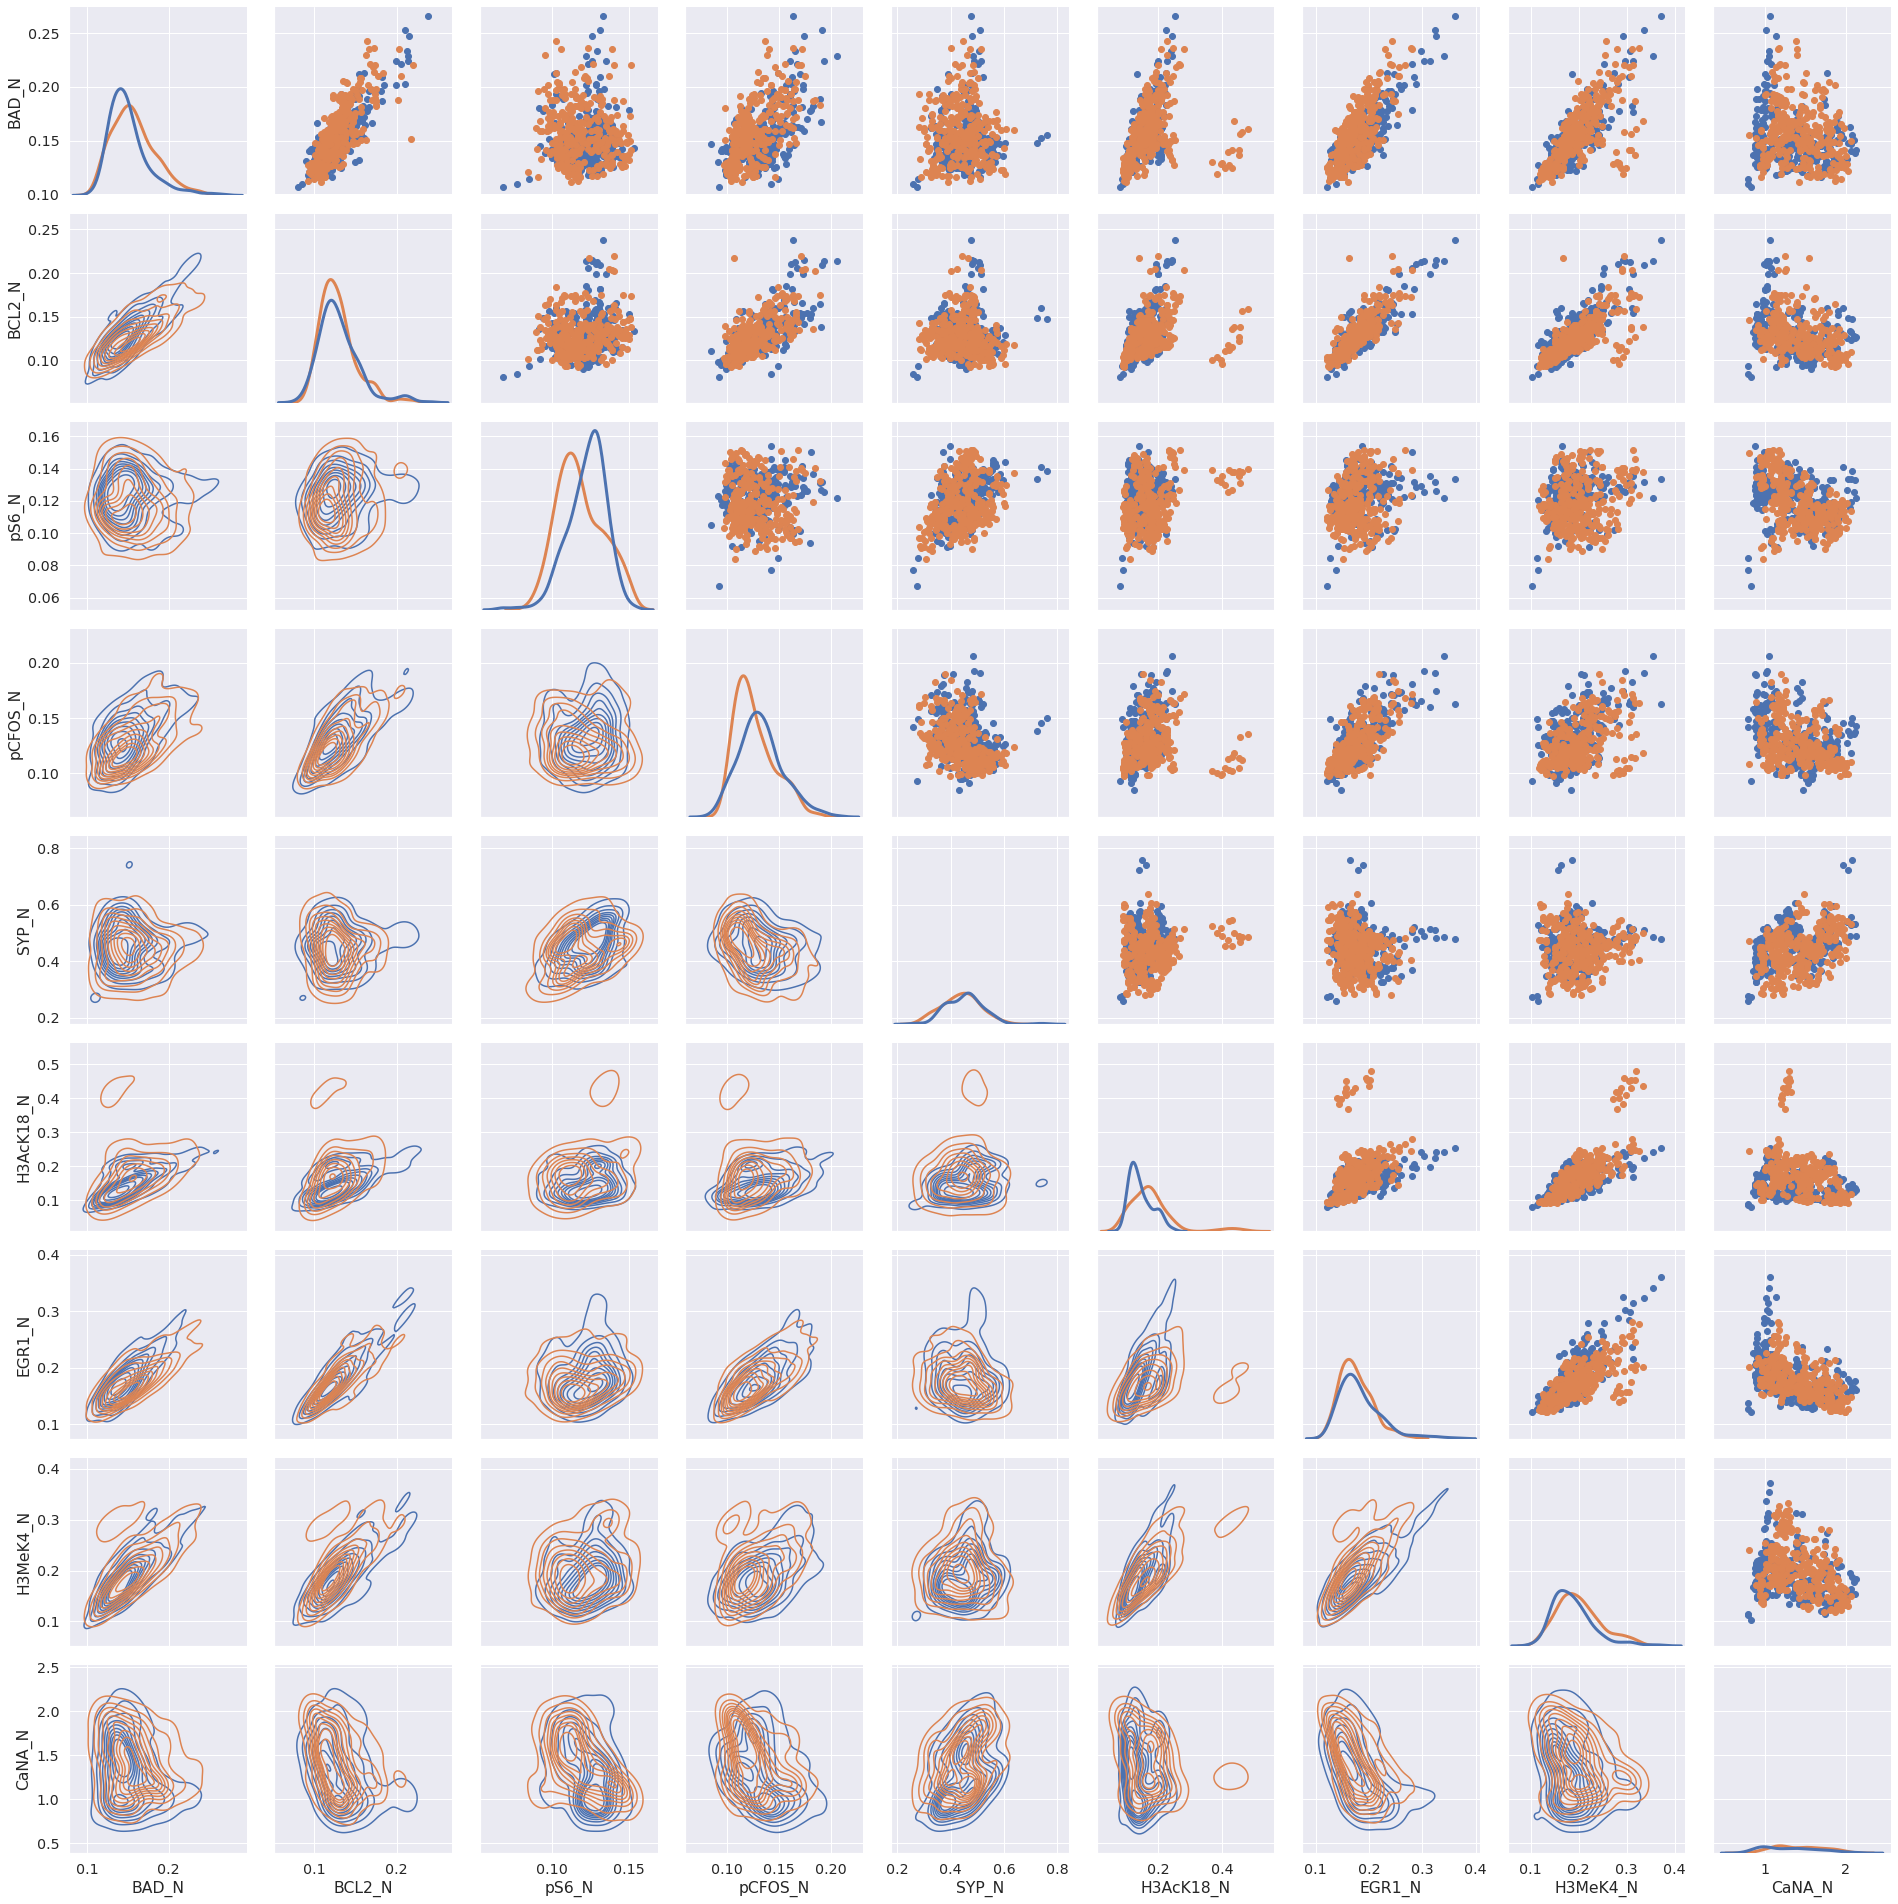

In [ ]:
g = sns.PairGrid(data.iloc[:, -13:-3].dropna(), hue='Genotype', height=3)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

#### 2. Variance Analysis

##### 2.1. Dependence of DYRK1A_N distribution on genotype

Mice samples are independent so we can use  Mann-whitney Test

In [ ]:
def print_tests(sample_1, sample_2):
    print(sps.ranksums(sample_1, sample_2))
    print('two-sided:', sps.mannwhitneyu(sample_1, sample_2, alternative='two-sided'))
    print('less:     ', sps.mannwhitneyu(sample_1, sample_2, alternative='less'))
    print('greater:  ', sps.mannwhitneyu(sample_1, sample_2, alternative='greater'))

In [ ]:
print_tests(data[data['Genotype']=='Control'].DYRK1A_N, data[data['Genotype']=='Ts65Dn'].DYRK1A_N)

RanksumsResult(statistic=-8.524927615692215, pvalue=1.529054072293614e-17)
two-sided: MannwhitneyuResult(statistic=101725.0, pvalue=1.5303452997371036e-17)
less:      MannwhitneyuResult(statistic=101725.0, pvalue=7.651726498685518e-18)
greater:   MannwhitneyuResult(statistic=101725.0, pvalue=1.0)


**Conclusion**

p-value<0.05 for $\mathsf{H}_1\colon G \leqslant F$ and $\mathsf{H}_1\colon \{F \leqslant G \text{ or } F \geqslant G\}$  It shows significant differences between normal and treated mice by this gene

In [ ]:
def sdvig(X,Y):
  W = []
  for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
      W.append(float(X[i]) - float(Y[j]))
  n = len(X)
  m = len(Y)
  k = int(np.floor(n*m/2 - 1/2 -sps.norm.ppf(0.95)*np.sqrt(n*m*(n+m+1)/12)))
  return [np.median(np.sort(W)),np.sort(W)[k +1], np.sort(W)[n*m-k]]  

In [ ]:
DYRK_c= data[data['Genotype'] == 'Control']['DYRK1A_N'].dropna().to_numpy()
DYRK_t = data[data['Genotype'] == 'Ts65Dn']['DYRK1A_N'].dropna().to_numpy()
print('Estimation of the shift parameter: '+ str(sdvig(DYRK_t,DYRK_c)[0]))

Estimation of the shift parameter: 0.069


In [ ]:
print('Confidence interval: (' + str(sdvig(DYRK_t,DYRK_c)[1])+',' + str(sdvig(DYRK_t,DYRK_c)[2]) + ')')


Confidence interval: (0.055,0.081)


**Conclusion:** The resulting estimate of the shift falls within the confidence interval for it.

##### 2.2. Dependence of BDNF_N distribution on genotype

In [ ]:
print_tests(data[data['Genotype']=='Control'].BDNF_N, data[data['Genotype']=='Ts65Dn'].BDNF_N)

RanksumsResult(statistic=1.332135966903698, pvalue=0.18281551335843915)
two-sided: MannwhitneyuResult(statistic=152167.0, pvalue=0.18284761646679482)
less:      MannwhitneyuResult(statistic=152167.0, pvalue=0.9086082927858418)
greater:   MannwhitneyuResult(statistic=152167.0, pvalue=0.09142380823339741)


In [ ]:
BDNF_c= data[data['Genotype'] == 'Control']['BDNF_N'].dropna().to_numpy()
BDNF_t = data[data['Genotype'] == 'Ts65Dn']['BDNF_N'].dropna().to_numpy()

print('Оценка параметра сдвига: '+ str(sdvig(BDNF_t,BDNF_c)[0]))
print('Доверительный интервал: (' + str(sdvig(BDNF_t,BDNF_c)[1])+',' + str(sdvig(BDNF_t,BDNF_c)[2]) + ')')


Estimation of the shift parameter: -0.0044
Confidence interval: (-0.009,0.0004)


**Conclusion** using Mann-Whitney test the hypothesis can't be rejected. So there is no significant differences in BDNF distributions

#### Tests of normality - the Shapiro–Wilk test  and QQ plot

In [ ]:
genes = ['DYRK1A_N','BDNF_N']
genotypes = ['Control', 'Ts65Dn']
for gene in genes:
  for genotype in genotypes:
    print(f'{gene} {genotype} p-value = ',sps.shapiro(data[data['Genotype'] == genotype][gene].dropna())[1])




DYRK1A_N Control p-value =  5.26884814628266e-37
DYRK1A_N Ts65Dn p-value =  2.1858962370763002e-16
BDNF_N Control p-value =  0.0015219403430819511
BDNF_N Ts65Dn p-value =  0.006184444297105074


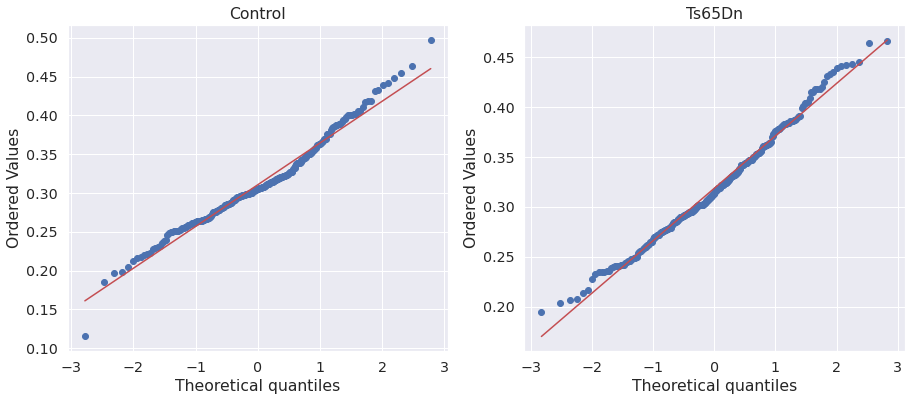

In [ ]:
plt.figure(figsize = (15,6))

ax1 = plt.subplot(1, 2, 1)
sps.probplot( data[data['Genotype'] == 'Control'].dropna()['BDNF_N'].to_numpy(), plot=ax1)
ax1.set_title('Control')
ax2 = plt.subplot(1, 2, 2)
sps.probplot(data[data['Genotype'] == 'Ts65Dn'].dropna()['BDNF_N'].to_numpy(), plot=ax2)
ax2.set_title('Ts65Dn')

plt.show()

For different genotypes different mice, i.e. samples are independent, so we apply two-sample Student's T-criterion. But these Shapiro-Wilk tests rejected the null hypothesis for these genes, so it's kind of impossible for them

In [ ]:
sps.ttest_ind(data[data['Genotype'] == 'Control'].dropna()['BDNF_N'].to_numpy(),data[data['Genotype'] == 'Ts65Dn'].dropna()['BDNF_N'].to_numpy(), equal_var=True)

Ttest_indResult(statistic=-1.7700353058728204, pvalue=0.07727521818516979)

**Conclusion:**  this test also did not reject the hypothesis of equality of distributions

#### 3.  Dependence of expression level on genotype for all proteins


The Student's test requires a normal distribution of a trait, and not everyone has such a distribution. Since the goal is selection, we need to reduce the number of false positives, i.e. we control FDR. And we have dependent samples, since different signs on the same mice, so we take one that does not require independence. So we take Benjamin-Uyekutili.

In [ ]:
p_vals = []
for protein in data.columns[1:-4]:
    control_sample = data[data['Genotype'] == 'Control'][protein].dropna()
    Ts56Dn_sample = data[data['Genotype'] == 'Ts65Dn'][protein].dropna()
    p_vals.append(sps.mannwhitneyu(control_sample, Ts56Dn_sample, alternative='two-sided')[1])
    
results = pd.DataFrame()
results['Отвергнута'], results['Скорректированные p-value'] =  multipletests(p_vals, alpha=0.1, method='fdr_by')[:2]
for i in range(data.columns[1:-4].shape[0]):
    results = results.rename(index={i: data.columns[1:-4][i]})


In [ ]:
results

Отвергнута  Скорректированные p-value
DYRK1A_N         True               2.544735e-15
ITSN1_N          True               4.939962e-30
BDNF_N          False               9.117095e-01
NR1_N            True               2.705592e-02
NR2A_N           True               3.269252e-05
...               ...                        ...
SYP_N            True               1.390248e-12
H3AcK18_N        True               4.490441e-07
EGR1_N           True               2.076598e-04
H3MeK4_N         True               1.292029e-03
CaNA_N          False               4.525175e-01

[77 rows x 2 columns]

In [ ]:
sdvig_list = []
for protein in data.columns[1:-4]:
  sdvig_list.append(sdvig(data[data['Genotype'] == 'Ts65Dn'][protein].dropna().to_numpy(),data[data['Genotype'] == 'Control'][protein].dropna().to_numpy())[0])

results.insert(2, "Сдвиг", sdvig_list)

In [ ]:
results

Отвергнута  Скорректированные p-value     Сдвиг
DYRK1A_N         True               2.544735e-15  0.067874
ITSN1_N          True               4.939962e-30  0.114045
BDNF_N          False               9.117095e-01 -0.004431
NR1_N            True               2.705592e-02 -0.065386
NR2A_N           True               3.269252e-05 -0.269391
...               ...                        ...       ...
SYP_N            True               1.390248e-12 -0.031573
H3AcK18_N        True               4.490441e-07  0.019280
EGR1_N           True               2.076598e-04 -0.010286
H3MeK4_N         True               1.292029e-03  0.013544
CaNA_N          False               4.525175e-01  0.038242

[77 rows x 3 columns]

**Вывод** Там, где гипотеза не отвергается - маленький сдвиг, и наоборот

### Task 2
Here we use dataset contains gene expression in normal tissue and in carcinoma. The data is published in the article `Notterman, et al, Cancer Research vol. 61: 2001`.
In total
A total of 18 tumor samples and their corresponding healthy tissues are available.


In [3]:
! wget http://genomics-pubs.princeton.edu/oncology/Data/CarcinomaNormalDatasetCancerResearchText.zip
! unzip CarcinomaNormalDatasetCancerResearchText.zip

--2022-10-31 21:40:21--  http://genomics-pubs.princeton.edu/oncology/Data/CarcinomaNormalDatasetCancerResearchText.zip
Resolving genomics-pubs.princeton.edu (genomics-pubs.princeton.edu)... 128.112.102.64
Connecting to genomics-pubs.princeton.edu (genomics-pubs.princeton.edu)|128.112.102.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 549752 (537K) [application/zip]
Saving to: ‘CarcinomaNormalDatasetCancerResearchText.zip’

CarcinomaNormalData 100%[===================>] 536.87K  3.02MB/s    in 0.2s    

2022-10-31 21:40:21 (3.02 MB/s) - ‘CarcinomaNormalDatasetCancerResearchText.zip’ saved [549752/549752]

Archive:  CarcinomaNormalDatasetCancerResearchText.zip
  inflating: CarcinomaNormalDatasetCancerResearch.txt  


In [4]:
data = pd.read_table(
    "CarcinomaNormalDatasetCancerResearch.txt", 
    skiprows=range(1,8), index_col=0, usecols=range(39)
)
data = data.drop(['Sample'], axis=1)

data.head()

Description  Tumor 27  \
Accession Number                                                                
X53416            Human mRNA for actin-binding protein (filamin)...      70.0   
M83670             "Human carbonic anhydrase IV mRNA, complete cds"     -81.0   
X90908                    H.sapiens mRNA for I-15P (I-BABP) protein      25.0   
M97496                   "Homo sapiens guanylin mRNA, complete cds"      10.0   
X90908                    H.sapiens mRNA for I-15P (I-BABP) protein      22.0   

                  Tumor 29  Tumor 34  Tumor 28  Tumor 35  Tumor 8  Tumor 3  \
Accession Number                                                             
X53416               108.0      75.0     871.0     -92.0     21.0    225.0   
M83670               -30.0      -1.0       4.0     -34.0    -13.0    118.0   
X90908                -7.0       5.0      14.0      14.0      5.0     -5.0   
M97496                60.0      48.0      78.0      19.0     11.0    175.0   
X90908                 0.0       6.0      -6.0      11.0    -18.0    -40.0   

                  Tumor 9  Tumor 4  ...  Normal 4  Normal 32  Normal 39  \
Accession Number                    ...                                   
X53416             -346.0   -378.0  ...     632.0     1412.0     1122.0   
M83670              -35.0     31.0  ...     185.0      288.0      416.0   
X90908               37.0    -29.0  ...    4723.0      -21.0       -7.0   
M97496               42.0    105.0  ...    1107.0      731.0     1559.0   
X90908               39.0    -54.0  ...    3344.0        8.0        5.0   

                  Normal 10  Normal 33  Normal 5  Normal 11  Normal 6  \
Accession Number                                                        
X53416                644.0     1760.0     488.0      164.0    1282.0   
M83670                625.0      320.0     564.0      330.0     116.0   
X90908                -28.0       -8.0     -29.0      -13.0      -4.0   
M97496               1762.0      917.0    1303.0      721.0     542.0   
X90908                 -7.0       -2.0      -9.0       12.0       0.0   

                  Normal 12  Normal 40  
Accession Number                        
X53416                 68.0      928.0  
M83670                718.0      332.0  
X90908                -50.0        4.0  
M97496               1816.0      412.0  
X90908                -28.0        0.0  

[5 rows x 37 columns]

In [ ]:
data.tail()

Description  Tumor 27  \
Accession Number                                                                
X54489            Human gene for melanoma growth stimulatory act...     123.0   
T55008            yb45h04.s1 Homo sapiens cDNA clone 74167 3' si...       2.0   
M10065            "Human apolipoprotein E (epsilon-4 allele) gen...      19.0   
NaN                                                             NaN       NaN   
NaN                                                             NaN       NaN   

                  Tumor 29  Tumor 34  Tumor 28  Tumor 35  Tumor 8  Tumor 3  \
Accession Number                                                             
X54489               271.0     127.0      59.0     265.0      3.0    110.0   
T55008                -1.0       7.0       3.0      -2.0      9.0      7.0   
M10065               -51.0     192.0     367.0     126.0    145.0    -14.0   
NaN                    NaN       NaN       NaN       NaN      NaN      NaN   
NaN                    NaN       NaN       NaN       NaN      NaN      NaN   

                  Tumor 9  Tumor 4  ...  Normal 4  Normal 32  Normal 39  \
Accession Number                    ...                                   
X54489               30.0     97.0  ...       3.0        8.0       16.0   
T55008               -5.0      0.0  ...      -4.0       -5.0      -17.0   
M10065              -53.0    -51.0  ...    -103.0       39.0      -10.0   
NaN                   NaN      NaN  ...       NaN        NaN        NaN   
NaN                   NaN      NaN  ...       NaN        NaN        NaN   

                  Normal 10  Normal 33  Normal 5  Normal 11  Normal 6  \
Accession Number                                                        
X54489                  8.0       19.0      11.0        3.0       7.0   
T55008                 15.0      -10.0       7.0       -5.0       3.0   
M10065                -97.0       -1.0    -145.0      -63.0     -69.0   
NaN                     NaN        NaN       NaN        NaN       NaN   
NaN                     NaN        NaN       NaN        NaN       NaN   

                  Normal 12  Normal 40  
Accession Number                        
X54489                 21.0       32.0  
T55008                 22.0       -5.0  
M10065               -214.0       72.0  
NaN                     NaN        NaN  
NaN                     NaN        NaN  

[5 rows x 37 columns]

In [5]:
data = data.iloc[:-2]
data.isna().sum()

Description    1
Tumor 27       0
Tumor 29       0
Tumor 34       0
Tumor 28       0
Tumor 35       0
Tumor 8        0
Tumor 3        0
Tumor 9        0
Tumor 4        0
Tumor 32       0
Tumor 39       0
Tumor 10       0
Tumor 33       0
Tumor 5        0
Tumor 11       0
Tumor 6        0
Tumor 12       0
Tumor 40       0
Normal 27      0
Normal 29      0
Normal 34      0
Normal 28      0
Normal 35      0
Normal 8       0
Normal 3       0
Normal 9       0
Normal 4       0
Normal 32      0
Normal 39      0
Normal 10      0
Normal 33      0
Normal 5       0
Normal 11      0
Normal 6       0
Normal 12      0
Normal 40      0
dtype: int64

In [6]:
data.iloc[:, 2:] = data.iloc[:, 2:].astype('float')

Let's check if all samples in the dataset are unique by comparing the number of unique gene IDs to the number of rows:

In [8]:
len(np.unique(data.index)), len(data.index)

(6604, 7464)

Some experiments were repeated more than once. We leave those where the average level of expression is higher.

In [7]:
data['mean_expr'] = data.iloc[:, 1:-1].mean(axis=1)
data.sort_values(by=['mean_expr'], ascending=False)
data = data.groupby('Accession Number').first()

In [8]:
expr_data, descr = data.drop(
    ['Description', 'mean_expr'], axis=1
), data.Description

In [11]:
expr_data.head()

Tumor 27  Tumor 29  Tumor 34  Tumor 28  Tumor 35  Tumor 8  \
Accession Number                                                              
BioB                  -2.0     -11.0     -17.0      -1.0     -14.0     -8.0   
BioC                  12.0       9.0      17.0      18.0      10.0     53.0   
BioD                 107.0      65.0     108.0      95.0      94.0    473.0   
D00003                 2.0       7.0       1.0      -3.0       0.0     10.0   
D00015                26.0      13.0      13.0       9.0       2.0     10.0   

                  Tumor 3  Tumor 9  Tumor 4  Tumor 32  ...  Normal 4  \
Accession Number                                       ...             
BioB                -13.0     31.0    -24.0     -17.0  ...     -23.0   
BioC                 -2.0     57.0    -15.0      54.0  ...     -16.0   
BioD                 93.0    161.0     60.0     232.0  ...      58.0   
D00003               15.0     -2.0     36.0      -1.0  ...     626.0   
D00015               20.0     17.0     21.0      17.0  ...      24.0   

                  Normal 32  Normal 39  Normal 10  Normal 33  Normal 5  \
Accession Number                                                         
BioB                  -10.0      -13.0      -25.0      -12.0     -10.0   
BioC                   13.0       14.0      -10.0       14.0     -18.0   
BioD                  104.0      117.0      142.0      123.0     207.0   
D00003                  0.0        0.0       74.0        4.0      13.0   
D00015                 79.0       22.0       52.0       59.0      40.0   

                  Normal 11  Normal 6  Normal 12  Normal 40  
Accession Number                                             
BioB                    3.0      -3.0      -24.0      -14.0  
BioC                   75.0     -20.0       22.0        3.0  
BioD                  461.0     137.0      289.0       82.0  
D00003                 24.0       4.0        4.0       -1.0  
D00015                 42.0      71.0       43.0       60.0  

[5 rows x 36 columns]

In [9]:
expr_data = expr_data.T

In [10]:
expr_data['Label'] = expr_data.index.map(
    lambda x: -1 if x.split(' ')[0] == 'Tumor' else 1
)

expr_data.head()

Accession Number  BioB  BioC   BioD  D00003  D00015  D00102  D00137  D00173  \
Tumor 27          -2.0  12.0  107.0     2.0    26.0     5.0    18.0     1.0   
Tumor 29         -11.0   9.0   65.0     7.0    13.0     2.0    13.0     5.0   
Tumor 34         -17.0  17.0  108.0     1.0    13.0     0.0    11.0    10.0   
Tumor 28          -1.0  18.0   95.0    -3.0     9.0    10.0    28.0     8.0   
Tumor 35         -14.0  10.0   94.0     0.0     2.0    -5.0     6.0    10.0   

Accession Number  D00265  D00306  ...  Z50753  Z50788  b-actin-3  b-actin-5  \
Tumor 27           153.0    -7.0  ...    35.0    -1.0      797.0      559.0   
Tumor 29           145.0    -7.0  ...    26.0     3.0     1298.0      409.0   
Tumor 34           132.0    -6.0  ...    25.0     1.0      862.0      667.0   
Tumor 28            73.0   -17.0  ...    41.0    -2.0     1047.0      643.0   
Tumor 35           184.0    10.0  ...    29.0     2.0     1253.0      437.0   

Accession Number  b-actin-M    cre  gapdh-3  gapdh-5  gapdh-M  Label  
Tumor 27              849.0  246.0   1214.0    676.0    873.0     -1  
Tumor 29             1093.0  414.0   1394.0    477.0    609.0     -1  
Tumor 34              961.0  449.0   1252.0    635.0    754.0     -1  
Tumor 28             1100.0  369.0   1313.0    785.0   1013.0     -1  
Tumor 35              844.0  345.0   1292.0    497.0    669.0     -1  

[5 rows x 6605 columns]

Let's look at the expression values of a random gene and compare the densities of these distributions.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


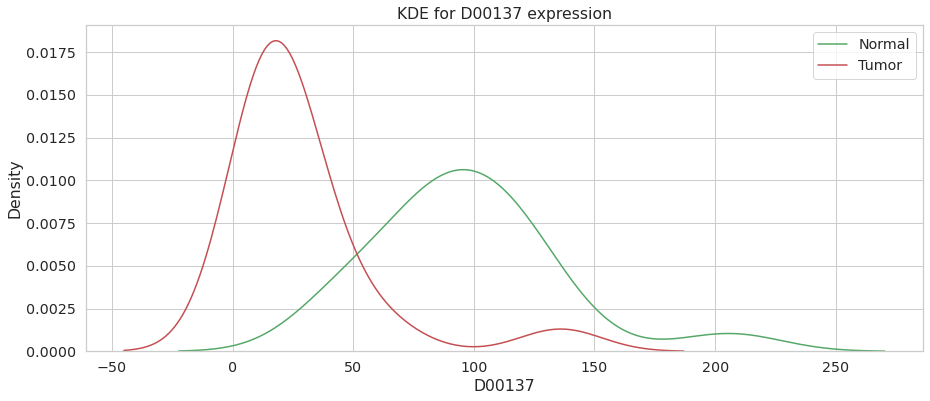

In [11]:
plt.figure(figsize=(15, 6))
sns.set_style('whitegrid')
sns.distplot(expr_data[(expr_data['Label']== 1)]['D00137'], label="Normal", kde=True, hist=False, color="g")

sns.distplot(expr_data[(expr_data['Label']== -1)]['D00137'], label="Tumor", kde=True, hist=False, color="r")
plt.legend()
plt.title('KDE for D00137 expression')
plt.show()

### Boxplots

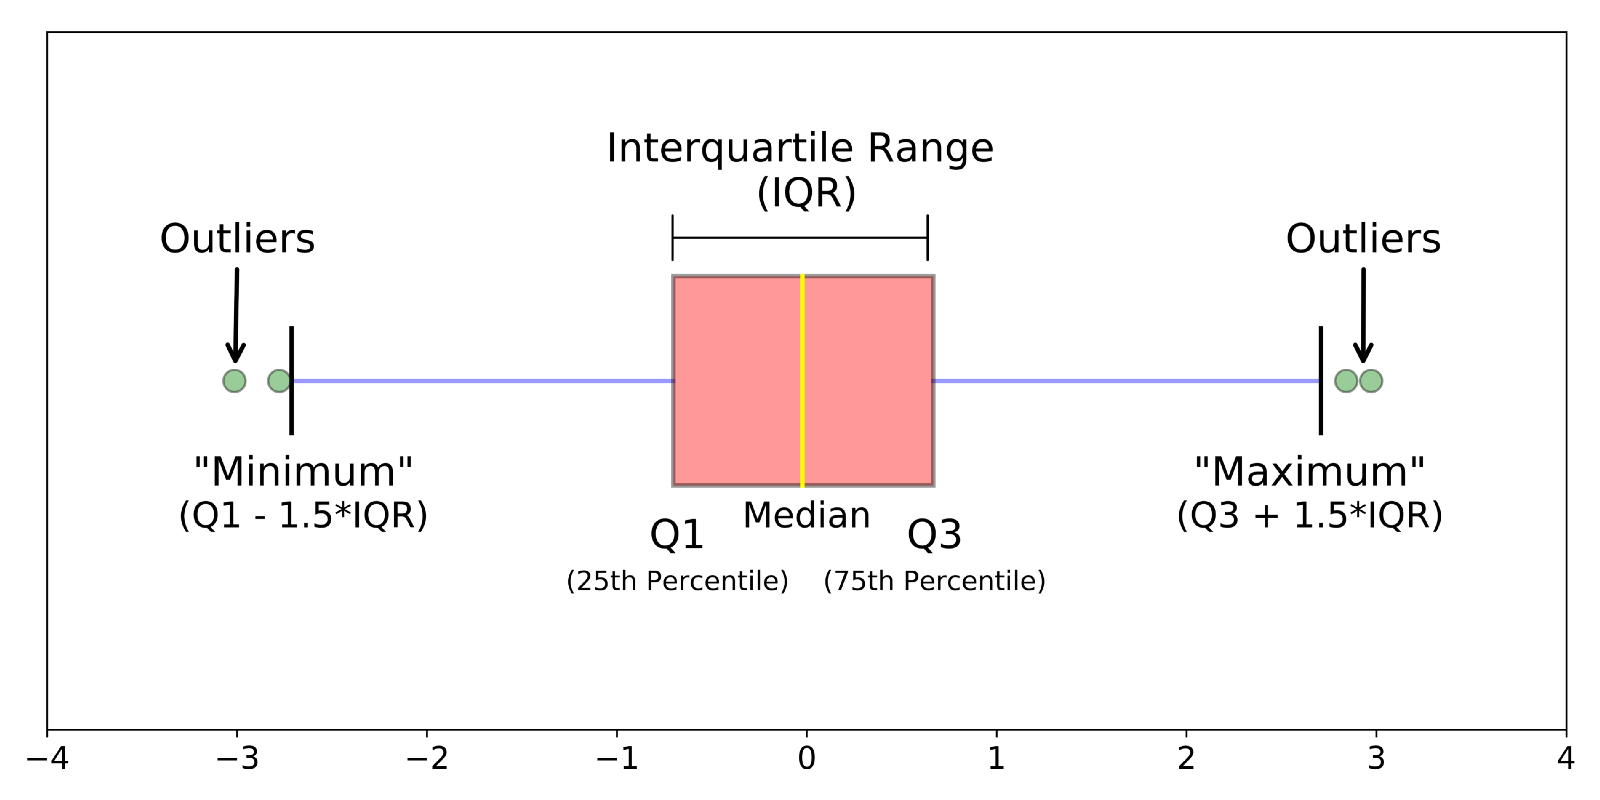

In [12]:
df_D00137 = pd.concat([expr_data[expr_data.Label==1].loc[:, ['D00137', 'Label']], 
                     expr_data[expr_data.Label==-1].loc[:, ['D00137', 'Label']]])

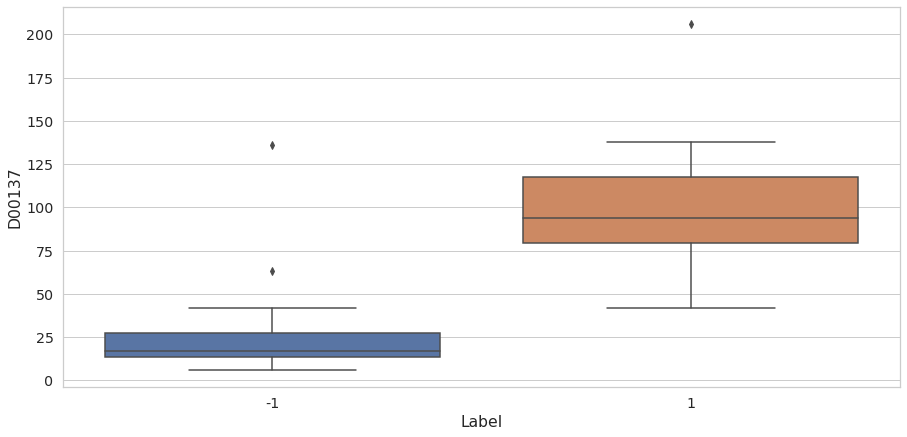

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(y=df_D00137['D00137'], x=df_D00137['Label'])
plt.show()

### Violinplot

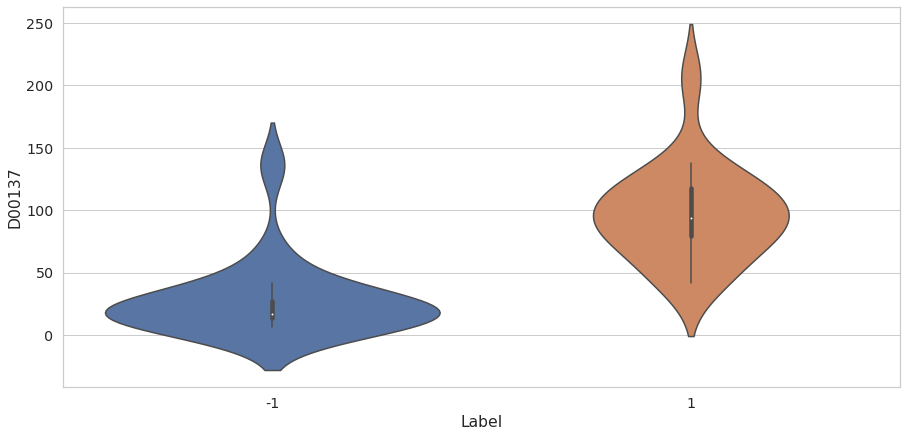

In [ ]:
plt.figure(figsize=(15, 7))
sns.violinplot(y=df_D00137['D00137'], x=df_D00137['Label'])
plt.show()

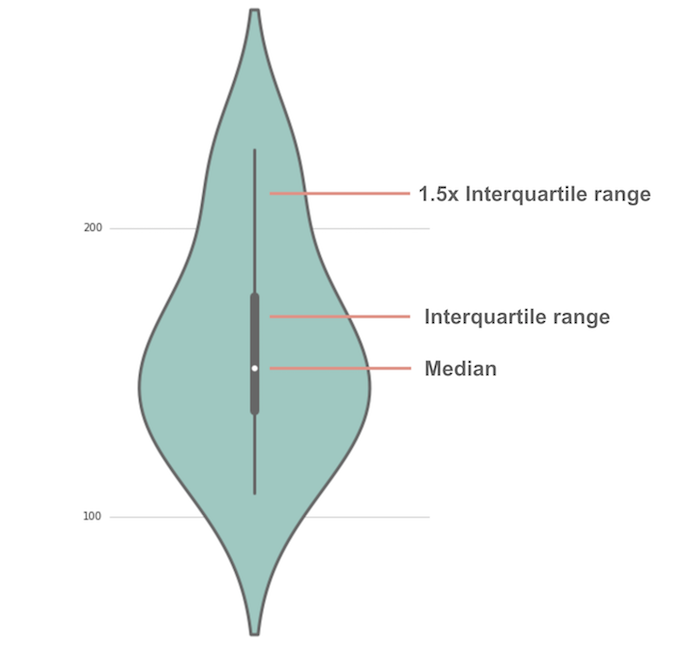

The graphs show that the expression profiles for a single random gene are possibly different.

Предварительный зрительный анализ может сказать очень многое о том, как устроены наши данные. Тем не менее, для получения полной картины простого взгляда на данные недостаточно. Первое на что нужно обрать внимание &mdash; это параметры распределения. Все распределения в первую очередь характеризуются медианой и средним. Для гена `D00137` вычислите медиану и средний уровень экспрессии в опухолевых и нормальных тканей.

In [13]:
print("Normal tissue. Median: " + str(np.median(df_D00137[df_D00137['Label']==1]['D00137'])) + ' Mean: '+ str(np.mean(df_D00137[df_D00137['Label']==1]['D00137'])) +'\n')
print("Tumor. Median: " + str(np.median(df_D00137[df_D00137['Label']==-1]['D00137'])) + ' Mean: '+ str(np.mean(df_D00137[df_D00137['Label']==-1]['D00137'])) +'\n')

Normal tissue. Median: 94.0 Mean: 97.0

Tumor. Median: 17.0 Mean: 28.166666666666668



In order to assert that "the `X' gene is overexpressed in tumor samples," it is not enough just to look at the boxplots, a statistical analysis must be performed.

For a single gene analysis, hypotheses are tested comparing expression profiles between tumor and control samples:  
   $\mathsf{H}_0\colon$ for gene `X` there is no difference in mean expressions;  
   $\mathsf{H}_1\colon$ for gene `X` there is a difference in average expressions.
    
Samples are normal and independent so here we use Student t-test

In [ ]:
data[data['Description']=='"Human class I alcohol dehydrogenase beta-1 subunit, allele 1 mRNA, complete cds"'][data.columns[0]]

Accession Number
D00137    "Human class I alcohol dehydrogenase beta-1 su...
Name: Description, dtype: object

In [ ]:
sps.ttest_ind(df_D00137[df_D00137['Label'] == 1]['D00137'].to_numpy(), df_D00137[df_D00137['Label'] == -1]['D00137'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=5.985803078987308, pvalue=1.0869056401678417e-06)

The null hypothesis of equality of averages is rejected. Apparently, the expression of this gene may be associated with the development of cancer